C:\Users\SANDRO\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


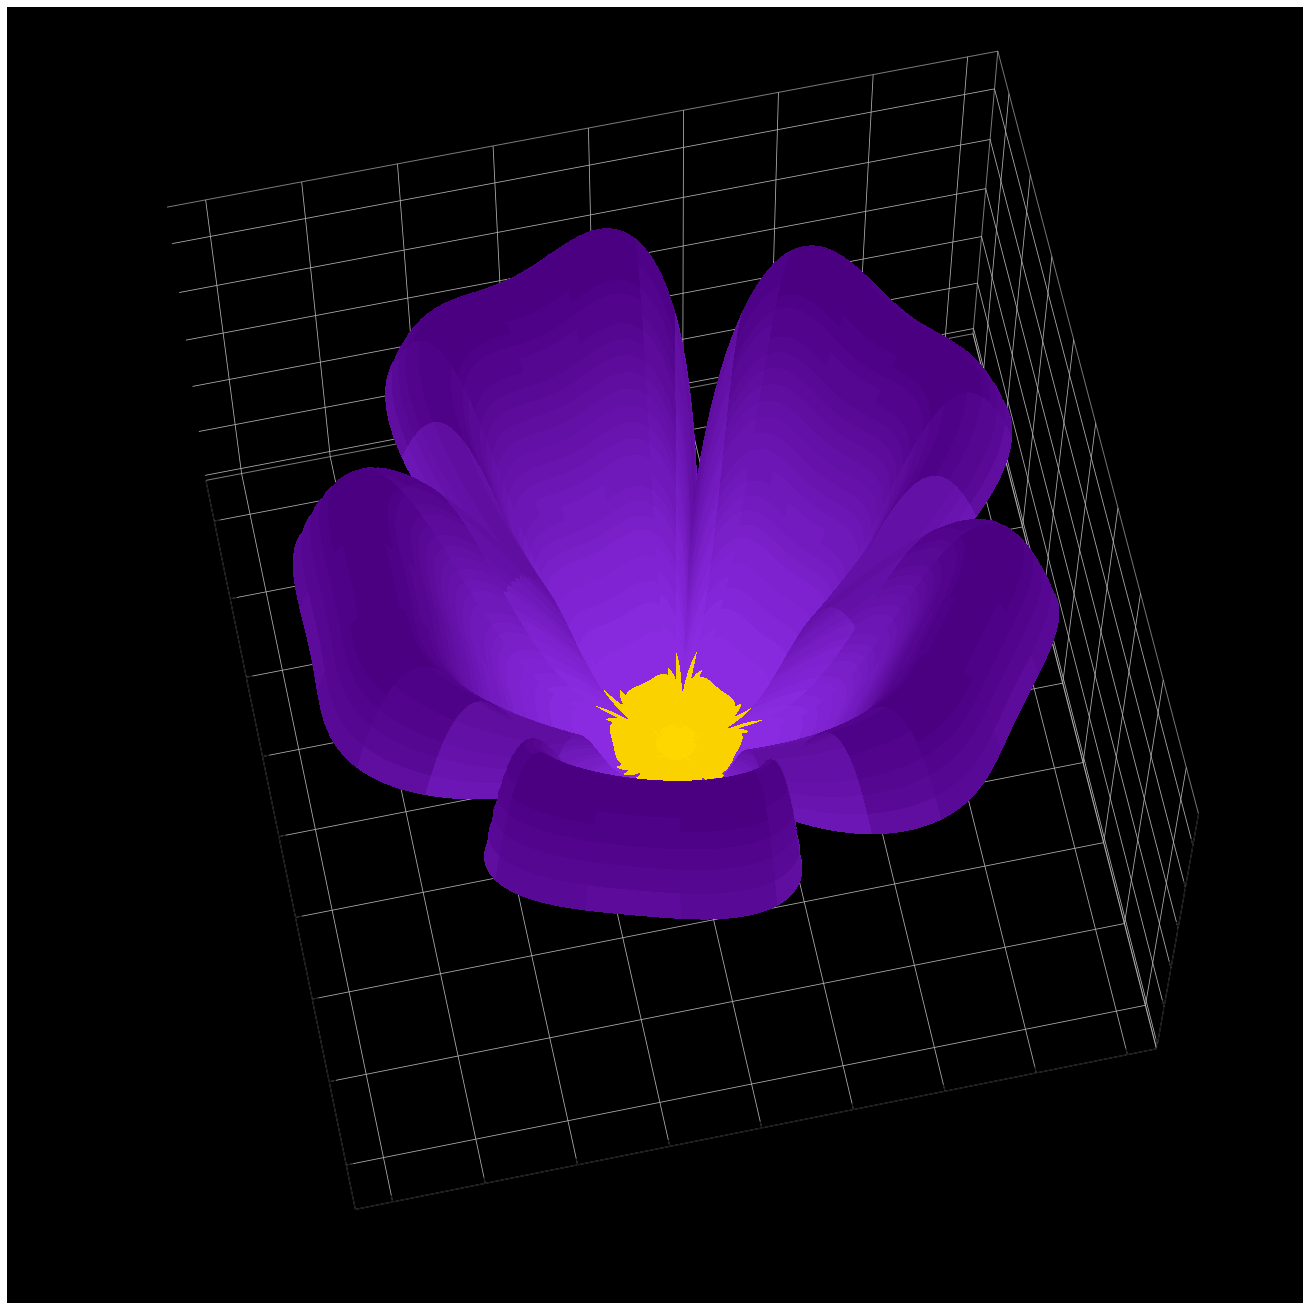

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import animation
from IPython.display import HTML

# Definir el número de puntos para la cuadrícula
n = 800

# Generar valores espaciados para el radio y el ángulo
r = np.linspace(0, 1, n)
theta = np.linspace(0, 2*np.pi, n)

# Crear una malla de radio y ángulo
[R, THETA] = np.meshgrid(r, theta, indexing='ij')

# Definir número de pétalos por ciclo
petalNum = 5

# Calcular coordenada x de la flor
tmp = petalNum * THETA
x = 1 - (1/2)*((5/4)*(1-(tmp%(2*np.pi))/np.pi)**2 - 1/4)**2

# Actualizar fórmula para evitar el efecto de espiral
phi = (np.pi/2)*np.exp(-1/4)

# Calcular la coordenada y de la flor
y = 1.95653*(R**2)*(1.27689*R - 1)**2 * np.sin(phi)

# Calcular el radio modificado para la flor
R2 = x*(R*np.sin(phi) + y*np.cos(phi))

# Convertir coordenadas polares a cartesianas
X = R2*np.sin(THETA)
Y = R2*np.cos(THETA)

# Calcular la coordenada z de la flor
Z = x*(R*np.cos(phi) - y*np.sin(phi))

# Definir el mapa de colores para la flor
mapSize = 20
blue_map = np.array([np.linspace(138, 75, mapSize).T,
                  np.linspace(43, 0, mapSize).T,
                  np.linspace(226, 130, mapSize).T]).T

gold_map = np.array([[255, 215, 0], [250, 210, 0]])
violet_map = np.concatenate((gold_map, blue_map))

# Crear figura 3D
fig = plt.figure(figsize=(18, 18))
ax = Axes3D(fig)
ax.set_facecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Establecer ángulo de vista para la gráfica
ax.view_init(azim=-12, elev=66)

# Crear mapa de colores personalizado
newcmp = ListedColormap(violet_map / 255)

# Graficar la superficie de la flor
surf = ax.plot_surface(X, Y, Z, cmap=newcmp, linewidth=0, antialiased=False)

In [31]:
# Definir la función de animación
def animate(i):
    # Calcular el ángulo de elevación
    if i <= 180:
        # Elevación cuando gira de 0° a 180°
        elev = 15.6 + 0.28*i
    else:
        # Elevación cuando gira de 180° a 360° 
        elev = 66 - 0.28*(i - 180)
    
    # Actualizar la vista de la gráfica
    ax.view_init(elev=elev, azim=i)
    return fig,

# Crear la animación
anim = animation.FuncAnimation(fig,
                               animate,
                               frames=360,
                               interval=20,
                               blit=True)

# Guardar la animación
anim.save('3D_purple_flower.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# Mostrar la animación
HTML(anim.to_html5_video())